# Clinical data

In [1]:
from data_helper import *
from topic_analysis import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
control = load_dump("hdump_new")
clinical = load_dump("idump_new")

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import words

In [4]:
FIRST_PRONOUNS = set(['i', 'me', 'myself', 'mine'])
ENG_STOPWORDS = set(stopwords.words('english'))
CONTR_PUNCT = set(["'ve", "'s", "'d", "n't", "'m", "'re", "'ll", ",", "'", "!", "?"]).union(ENG_STOPWORDS)
DROP_LIST = CONTR_PUNCT.difference(FIRST_PRONOUNS)

In [5]:
vec_clin = CountVectorizer(max_features=50000, min_df=3, stop_words=DROP_LIST)
fit_vec = vec_clin.fit(clinical)

In [6]:
vec_clinical = vec_clin.transform(clinical).toarray()

In [7]:
vocab_clin = np.array(vec_clin.get_feature_names())

In [9]:
n_topics = 50

In [10]:
lda_clinic = LatentDirichletAllocation(n_components=n_topics, 
                                       max_iter=20, 
                                       learning_method='batch',
                                       random_state=5)

In [11]:
fit_lda = lda_clinic.fit(vec_clinical)

KeyboardInterrupt: 

In [ ]:
topic_doc_clinical = lda_clinic.transform(vec_clinical)

In [ ]:
get_topic_top_words(lda_clinic, vocab_clin, 40, 4)

In [47]:
get_topic_top_words(lda_clinic, vocab_clin, 40, 3)


Topic #3:


'me god one like depression life wa love would know though think good may poetry poem must world never man could self much doe better see without even say come hope heart two today nothing mind light still ce book'

In [ ]:
plot_heatmap(topic_doc_clinical, np.arange(n_topics))

# Control data

In [49]:
vec_contr = CountVectorizer(max_features=50000, min_df=3, stop_words=DROP)
fit_vec = vec_contr.fit(control)

In [50]:
vec_control = vec_contr.transform(control)

In [51]:
vocab_contr = np.array(vec_contr.get_feature_names())

In [52]:
lda_control = LatentDirichletAllocation(n_components=n_topics, 
                                        max_iter=50, 
                                        learning_method='batch',
                                        random_state=5)

In [53]:
fit_lda = lda_control.fit(vec_control)

In [54]:
topic_doc_control = lda_control.transform(vec_control)

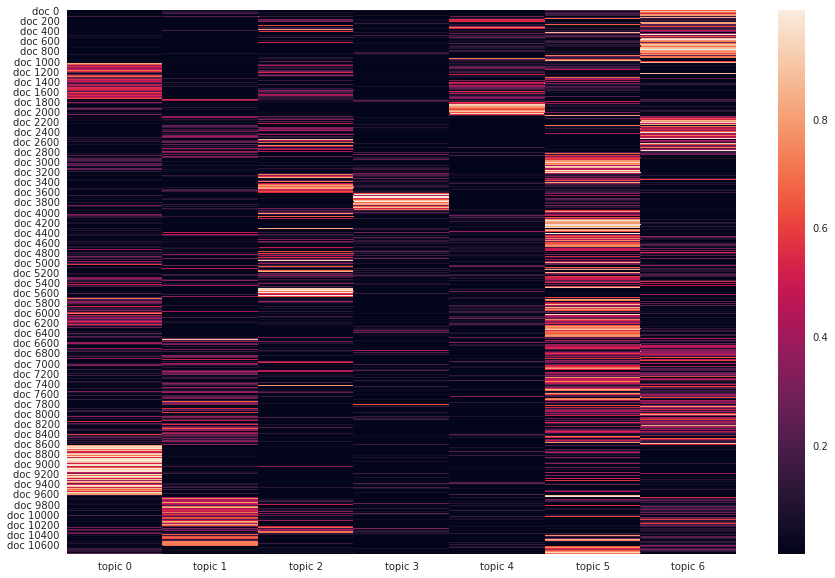

In [55]:
plot_heatmap(topic_doc_control)


In [56]:
get_topic_top_words(lda_control, vocab_contr, 40, 1)


Topic #1:


'wa mental patient care health people treatment psychiatric medical disorder would clinical hospital illness psychiatrist may time psychiatry diagnosis also need one person state case many medication social problem act practice physician even day based like bipolar use assessment could'

In [57]:
get_topic_top_words(lda_control, vocab_contr, 40, 2)


Topic #2:


'depression brain disease effect study also may one wa anxiety blood research treatment heart pain side medication system high drug found low risk stress body use disorder cause cancer sleep used associated placebo lower people well much many diet heat'